**AIVLE School 미니프로젝트**
### **네비게이션 주행데이터를 이용한 <span style="color:darkgreen">도착시각</span> 예측 문제**
---

<br>

#### **<span style="color:red">[미션 안내]</span>**
* 네비게이션 주행데이터를 읽어들여 데이터를 분석 및 전처리한 후 머신러닝과 딥러닝으로 도착시각을 예측하고 결과를 분석하세요.

#### **<span style="color:red">[유의 사항]</span>**
* 각 문항의 답안코드는 반드시 '#여기에 답안코드를 작성하세요'로 표시된 cell에 작성해야 합니다.
* 제공된 cell을 추가/삭제하고 다른 cell에 답안코드를 작성 시 채점되지 않습니다.
* 반드시 문제에 제시된 가이드를 읽고 답안 작성하세요.
* 문제에 변수명이 제시된 경우 반드시 해당 변수명을 사용하세요.
* 문제와 데이터는 제3자에게 공유하거나 개인적인 용도로 사용하는 등 외부로 유출할 수 없으며 유출로 인한 책임은 응시자 본인에게 있습니다.

<br>

### 1. scikit-learn 패키지는 머신러닝 교육을 위한 최고의 파이썬 패키지입니다.
### scikit-learn를 별칭(alias) sk로 임포트하는 코드를 작성하고 실행하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
import sklearn as sk

<br>

### 2. Pandas는 데이터 분석을 위해 널리 사용되는 파이썬 라이브러리입니다.
### Pandas를 사용할 수 있도록 별칭(alias)을 pd로 해서 불러오세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
import pandas as pd

<br>

### 3. 모델링을 위해 분석 및 처리할 데이터 파일을 읽어오려고 합니다.
### Pandas함수로 데이터 파일을 읽어 데이터프레임 변수명 df에 할당하는 코드를 작성하세요.
* A0007IT.json 파일을 읽어 데이터 프레임 변수명 df에 할당하세요.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 여기에 답안코드를 작성하세요.
df=pd.read_json('/content/drive/MyDrive/미니프로젝트/5차_주행데이터를 이용한 도착시각 예측/A0007IT.json')

<br>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family = 'NanumGothicCoding')

In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 27.8 MB/s eta 0:00:00


### 4. Address1(주소1)에 대한 분포도를 알아 보려고 합니다.
### Address1(주소1)에 대해 countplot그래프로 만들고 아래 가이드에 따라 답하세요.
* Seaborn을 활용하세요.
* 첫번째, Address1(주소1)에 대해서 분포를 보여주는 countplot그래프 그리세요.
* 두번째, 지역명이 없는 '-'에 해당되는 row(행)을 삭제하세요.

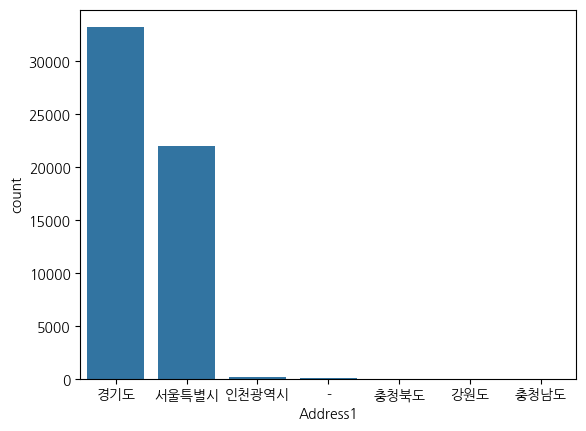

In [ ]:
# 여기에 답안코드를 작성하세요.
import seaborn as sns

sns.countplot(x='Address1', data= df)
plt.show()

df.drop(df[df['Address1'] == '-'].index, inplace=True)

In [ ]:
df['Address1'].value_counts()

경기도      33217
서울특별시    22045
인천광역시      175
강원도          2
충청북도         1
충청남도         1
Name: Address1, dtype: int64

<br>

### 5. 실주행시간과 평균시속의 분포를 같이 확인하려고 합니다.
### Time_Driving(실주행시간)과 Speed_Per_Hour(평균시속)을 jointplot 그래프로 만드세요.
* Seaborn을 활용하세요.
* X축에는 Time_Driving(실주행시간)을 표시하고 Y축에는 Speed_Per_Hour(평균시속)을 표시하세요.

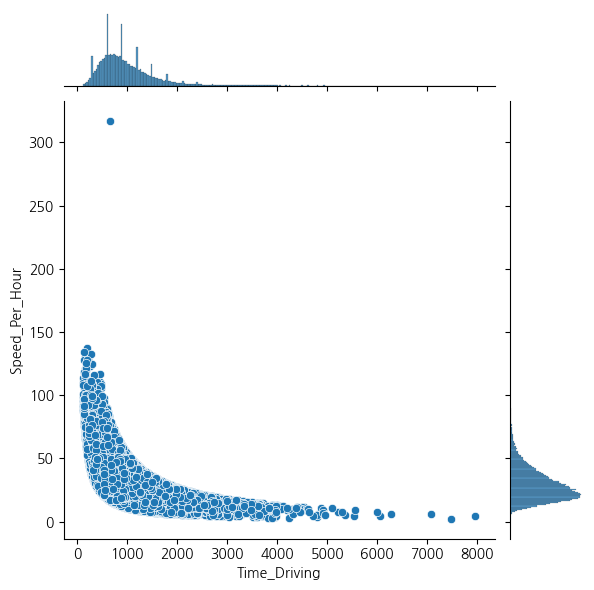

In [ ]:
# 여기에 답안코드를 작성하세요.
sns.jointplot(x='Time_Driving', y='Speed_Per_Hour', data=df)

<br>

### 6. 위의 jointplot 그래프에서 시속 300이 넘는 이상치를 발견할 수 있습니다.
### jointplot 그래프에서 발견한 이상치 1개를 삭제하세요.
* 대상 데이터프레임: df
* jointplot 그래프를 보고 시속 300 이상되는 이상치를 찾아 해당 행(Row)을 삭제하세요.
* 전처리 반영 후에 새로운 데이터프레임 변수명 df_temp에 저장하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
temp = df[df['Speed_Per_Hour'] >= 300].index
df_temp=df.drop(temp)

<br>

### 7. 모델링 성능을 제대로 얻기 위해서 결측치 처리는 필수입니다.
### 아래 가이드를 따라 결측치 처리하세요.
* 대상 데이터프레임: df_temp
* 결측치를 확인하는 코드를 작성하세요.
* 결측치가 있는 행(raw)를 삭제 하세요.
* 전처리 반영된 결과를 새로운 데이터프레임 변수명 df_na에 저장하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
df_temp.isnull().sum()
df_na = df_temp.dropna(axis=0)

<br>

### 8. 모델링 성능을 제대로 얻기 위해서 불필요한 변수는 삭제해야 합니다.
### 아래 가이드를 따라 불필요 데이터를 삭제 처리하세요.
* 대상 데이터프레임: df_na
* 'Time_Departure', 'Time_Arrival' 2개 컬럼을 삭제하세요.
* 전처리 반영된 결과를 새로운 데이터프레임 변수명 df_del에 저장하세요.d

In [ ]:
# 여기에 답안코드를 작성하세요.
df_del = df_na.drop(['Time_Departure', 'Time_Arrival'], axis=1)

<br>

### 9. 원-핫 인코딩(One-hot encoding)은 범주형 변수를 1과 0의 이진형 벡터로 변환하기 위하여 사용하는 방법입니다.
### 원-핫 인코딩으로 아래 조건에 해당하는 컬럼 데이터를 변환하세요.
* 대상 데이터프레임: df_del
* 원-핫 인코딩 대상: object 타입의 전체 컬럼
* 활용 함수: pandas의 get_dummies
* 해당 전처리가 반영된 결과를 데이터프레임 변수 df_preset에 저장해 주세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
object_cols = df_del.select_dtypes(include=['object']).columns
df_preset = pd.get_dummies(df_del, columns=object_cols, drop_first=True)

In [ ]:
df_preset.head

<bound method NDFrame.head of        Distance  Time_Driving  Speed_Per_Hour  Signaltype  Weekday  Hour  Day  \
0       12914.0   1201.534058       38.692536           7        0     5   20   
1        7483.0    823.817017       32.699980          31        0     5   20   
2        8087.0    526.710998       55.273575           6        0     0   20   
3       10528.0    898.581970       42.178456           2        0     0   20   
4       10636.0    957.758972       39.978326          28        0     0   20   
...         ...           ...             ...         ...      ...   ...  ...   
55526    4448.0    544.301025       29.419015          22        4    23   24   
55527    3106.0    535.666992       20.874163          16        4    23   24   
55528   10325.0    610.799988       60.854618           5        4    23   24   
55529    4458.0    878.479004       18.268849          32        4    23   24   
55530    3780.0    553.580994       24.581769          18        4    23   24   

       Address1_경기도  Address1_서울특별시  Address1_인천광역시  ...  Address2_중구  \
0                 1               0               0  ...            0   
1                 0               1               0  ...            0   
2                 1               0               0  ...            0   
3                 1               0               0  ...            0   
4                 1               0               0  ...            0   
...             ...             ...             ...  ...          ...   
55526             1               0               0  ...            0   
55527             0               1               0  ...            0   
55528             0               1               0  ...            0   
55529             0               1               0  ...            0   
55530             0               1               0  ...            0   

       Address2_중랑구  Address2_진천군  Address2_철원군  Address2_파주시  Address2_평택시  \
0                 0             0             0             0             0   
1                 0             0             0             0             0   
2                 0             0             0             0             0   
3                 0             0             0             0             0   
4                 0             0             0             0             0   
...             ...           ...           ...           ...           ...   
55526             0             0             0             1             0   
55527             0             0             0             0             0   
55528             0             0             0             0             0   
55529             0             0             0             0             0   
55530             0             0             0             0             0   

       Address2_포천시  Address2_하남시  Address2_홍천군  Address2_화성시  
0                 0             0             0             0  
1                 0             0             0             0  
2                 0             0             0             0  
3                 0             0             0             0  
4                 0             0             0             0  
...             ...           ...           ...           ...  
55526             0             0             0             0  
55527             0             0             0             0  
55528             0             0             0             0  
55529             0             0             0             0  
55530             0             0             0             0  

[55431 rows x 88 columns]>

<br>

### 10. 훈련과 검증 각각에 사용할 데이터셋을 분리하려고 합니다.
### Time_Driving(실주행시간) 컬럼을 label값 y로, 나머지 컬럼을 feature값 X로 할당한 후 훈련데이터셋과 검증데이터셋으로 분리하세요.
* 대상 데이터프레임: df_preset
* 훈련 데이터셋 label: y_train, 훈련 데이터셋 Feature: X_train
* 검증 데이터셋 label: y_valid, 검증 데이터셋 Feature: X_valid
* 훈련 데이터셋과 검증데이터셋 비율은 80:20
* random_state: 42
* Scikit-learn의 train_test_split 함수를 활용하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
from sklearn.model_selection import train_test_split

X=df_preset.drop('Time_Driving', axis=1)
y=df_preset['Time_Driving']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((44344, 87), (11087, 87), (44344,), (11087,))

<br>

### 11. Time_Driving(실주행시간)을 예측하는 머신러닝 모델을 만들려고 합니다.
### 의사결정나무(decision tree)는 여러 가지 규칙을 순차적으로 적용하면서 독립 변수 공간을 분할하는 모형으로
### 분류(classification)와 회귀 분석(regression)에 모두 사용될 수 있습니다.
### 의사결정나무(decision tree)로 학습을 진행하세요.
* 트리의 최대 깊이: 5로 설정
* 노드를 분할하기 위한 최소한의 샘플 데이터수(min_samples_split): 3로 설정
* random_state: 120로 설정

In [ ]:
# 여기에 답안코드를 작성하세요.
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=5, min_samples_split=3, random_state=120)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=3, random_state=120)

<br>

### 12. 위 의사결정나무(decision tree) 모델의 성능을 평가하려고 합니다.
### 예측 결과의 mae(Mean Absolute Error)를 구하세요.
* 성능 평가는 검증 데이터셋을 활용하세요.
* 11번 문제에서 만든 의사결정나무(decision tree) 모델로 y값을 예측(predict)하여 y_pred에 저장하세요.
* 검증 정답(y_valid)과 예측값(y_pred)의 mae(Mean Absolute Error)를 구하고 dt_mae 변수에 저장하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
from sklearn.metrics import mean_absolute_error

y_pred = dt.predict(X_valid)
dt_mae = mean_absolute_error(y_valid, y_pred)

<br>

##### **<span style="color:red">다음 문항을 풀기 전에</span> 아래 코드를 실행하세요.**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

tf.random.set_seed(1)

<br>

### 13. Time_Driving(실주행시간)을 예측하는 딥러닝 모델을 만들려고 합니다.
### 아래 가이드에 따라 모델링하고 학습을 진행하세요.
* Tensoflow framework를 사용하여 딥러닝 모델을 만드세요.
* 히든레이어(hidden layer) 2개이상으로 모델을 구성하세요.
* dropout 비율 0.2로 Dropout 레이어 1개를 추가해 주세요.
* 손실함수는 MSE(Mean Squared Error)를 사용하세요.
* 하이퍼파라미터 epochs: 30, batch_size: 16으로 설정해주세요.
* 각 에포크마다 loss와 metrics 평가하기 위한 데이터로 X_valid, y_valid 사용하세요.
* 학습정보는 history 변수에 저장해주세요

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error
import numpy as np

# 모델 초기화
model = Sequential()

# 입력 레이어 및 첫 번째 히든 레이어
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))

# 두 번째 히든 레이어
model.add(Dense(32, activation='relu'))

# 세 번째 히든 레이어
model.add(Dense(16, activation='relu'))

# 출력 레이어
model.add(Dense(1))

# 모델 컴파일
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 학습
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_valid, y_valid))

# 학습 정보 저장
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_mae = history.history['mae']
val_mae = history.history['val_mae']


Epoch 1/30
2772/2772 [==============================] - 7s 2ms/step - loss: 186266.9531 - mae: 297.8747 - val_loss: 104921.7891 - val_mae: 211.2800
Epoch 2/30
2772/2772 [==============================] - 8s 3ms/step - loss: 71561.5859 - mae: 174.4492 - val_loss: 41041.1758 - val_mae: 137.0592
Epoch 3/30
2772/2772 [==============================] - 5s 2ms/step - loss: 37581.2539 - mae: 126.4923 - val_loss: 38873.5938 - val_mae: 150.7154
Epoch 4/30
2772/2772 [==============================] - 7s 3ms/step - loss: 26948.5898 - mae: 105.0675 - val_loss: 39758.5781 - val_mae: 156.6749
Epoch 5/30
2772/2772 [==============================] - 5s 2ms/step - loss: 20428.8457 - mae: 90.3234 - val_loss: 31718.2598 - val_mae: 149.7634
Epoch 6/30
2772/2772 [==============================] - 7s 2ms/step - loss: 19544.3633 - mae: 86.4707 - val_loss: 32387.4453 - val_mae: 145.0866
Epoch 7/30
2772/2772 [==============================] - 6s 2ms/step - loss: 17606.5059 - mae: 82.3817 - val_loss: 134248.375

<br>

### 14. 위 딥러닝 모델의 성능을 평가하려고 합니다.
### Matplotlib 라이브러리 활용해서 학습 mse와 검증 mse를 그래프로 표시하세요.
* 1개의 그래프에 학습 mse과 검증 mse 2가지를 모두 표시하세요.
* 위 2가지 각각의 범례를 'mse', 'val_mse'로 표시하세요.
* 그래프의 타이틀은 'Model MSE'로 표시하세요.
* X축에는 'Epochs'라고 표시하고 Y축에는 'MSE'라고 표시하세요.

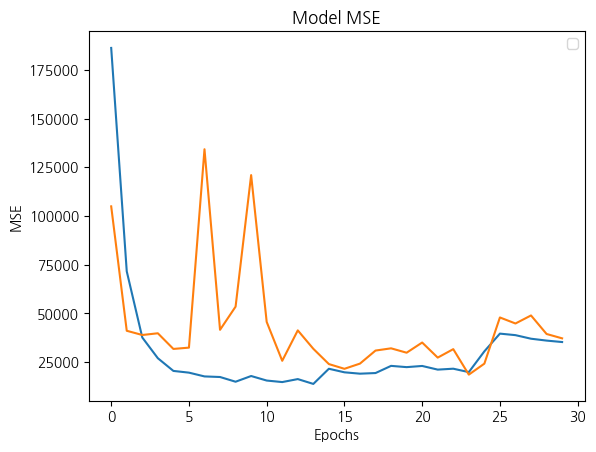

In [ ]:
# 여기에 답안코드를 작성하세요.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()
